# <0. 필요 패키지 설치하기>

# <1-1. 필요 라이브러리 불러오기>

In [26]:
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# import function libraries
import numpy as np
import keras
import os, sys ,math, copy
import scipy.io as sio
import tensorflow as tf
from keras.models import Model, Sequential
from keras.engine import Layer, InputSpec
from keras.optimizers import RMSprop, SGD, Adam
from keras import initializers, regularizers, constraints
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras import backend as K
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

sys.setrecursionlimit(10000)

import matplotlib.pyplot as plt

# <1-2. 데이터 불러오기>

In [3]:
# 파일 경로 확인!
# train.csv 파일은 현재 실행한 CNC_network.ipynb 파일과 같은 폴더에 저장되어야 함
# 개별 생산 단위 데이터 파일 경로 설정
# CNC Virtual Data set _v2 폴더의 파일 경로 복사하여 path 의 ' '안에 붙여넣기

train_sample = pd.read_csv("train.csv", header=0, encoding='utf-8')
path = r'../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2'
all_files = glob.glob(path + "\*.csv")

# count the number of pass/fail items

train_sample_np = np.array(train_sample.copy())


# load csv file
li_df = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)    
    li_df.append(df)

# <2-1. 데이터 종류 확인>

In [4]:
train_sample

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [5]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,176.0,4.9750,-1.250,176.0,5.0,5.0,-1.420,0.0227,327,0.355,...,0.499,2.710000e-19,327,0.0,0.000003,17,1,2,50,Prep
1,176.0,5.0250,23.775,176.0,5.0,5.0,-1.740,0.0224,327,0.589,...,0.790,2.710000e-19,327,0.0,-0.000003,17,1,0,50,Prep
2,176.0,4.9750,-1.250,176.0,5.0,5.0,0.180,0.0329,327,2.190,...,-1.300,2.710000e-19,327,0.0,-0.000006,17,1,0,50,Prep
3,176.0,4.9625,-13.750,176.0,5.0,5.0,-0.619,0.0198,327,1.010,...,-3.810,2.710000e-19,327,0.0,0.000002,17,1,0,50,Prep
4,176.0,4.9750,-4.400,176.0,5.0,5.0,-0.779,0.0311,327,0.372,...,0.790,2.710000e-19,327,0.0,0.000000,17,1,0,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,179.0,3.5625,8.150,179.0,3.5,5.0,-0.941,0.0215,328,1.790,...,0.244,2.770000e-19,328,0.0,-0.000003,17,1,0,20,End
561,178.5,3.5350,30.000,178.5,3.5,5.0,-0.780,0.0202,328,1.070,...,0.244,2.770000e-19,328,0.0,0.000000,17,1,0,20,End
562,178.5,3.5475,17.500,178.5,3.5,5.0,0.501,0.0190,328,0.990,...,0.128,2.770000e-19,328,0.0,0.000000,17,1,0,20,End
563,178.5,3.4475,11.250,178.5,3.5,5.0,-0.298,0.0193,328,1.370,...,0.657,2.770000e-19,328,0.0,-0.000008,17,1,0,20,End


In [6]:
# path에 있는 25개의 개별 생산 단위 데이터 파일의 경로 확인
print(all_files)

['../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_01.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_02.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_03.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_04.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_05.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_06.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_07.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_08.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_09.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_10.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_11.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\experiment_12.csv', '../dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2\\exper

# <2-2 데이터 개수 확인>

In [7]:
# count the number of pass/fail items
nb_pass = 0
nb_pass_half = 0
nb_defective = 0
for i in range(len(train_sample_np)):
    if train_sample_np[i,5] == 'no':
        nb_defective += 1
    if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] =='yes':
        nb_pass += 1
    if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'no':
        nb_pass_half += 1
        
print('양품 샘플 개수 : ', nb_pass)
print('공정 마쳤으나 육안검사 통과 못한 샘플 개수 : ', nb_pass_half)
print('공정 중지된 샘플 개수 : ', nb_defective)
print('전체 샘플 개수 : ', nb_pass + nb_pass_half + nb_defective)

양품 샘플 개수 :  13
공정 마쳤으나 육안검사 통과 못한 샘플 개수 :  6
공정 중지된 샘플 개수 :  6
전체 샘플 개수 :  25


# < 3-1. 사용자 정의 함수 선언 >

In [8]:
def tool_condition(input):
    for i in range(len(input)):
        if input[i,4] == 'unworn':
            input[i,4] = 0
        else:
            input[i,4] = 1
    return input

def item_inspection(input):
    for i in range(len(input)):
        if input[i,5] == 'no':
            input[i,6] = 2
        elif input[i,5] == 'yes' and input[i,6] == 'no':
            input[i,6] = 1
        elif input[i,5] == 'yes' and input[i,6] == 'yes':
            input[i,6] = 0
    return input


def machining_process(input):
    for i in range(len(input)):
        if input[i,47] == 'Prep':
            input[i,47] = 0
        elif input[i,47] == 'Layer 1 Up':
            input[i,47] = 1
        elif input[i,47] == 'Layer 1 Down':
            input[i,47] = 2
        elif input[i,47] == 'Layer 2 Up':
            input[i,47] = 3
        elif input[i,47] == 'Layer 2 Down':
            input[i,47] = 4
        elif input[i,47] == 'Layer 3 Up':
            input[i,47] = 5
        elif input[i,47] == 'Layer 3 Down':
            input[i,47] = 6
        elif input[i,47] == 'Repositioning':
            input[i,47] = 7
        elif input[i,47] == 'End' or 'end':
            input[i,47] = 8        
        elif input[i,47] == 'Starting':
            input[i,47] = 9
    return input


# <3-2. 사용자 정의 함수의 사용을 통한 데이터 분류>

In [9]:
# Modifying train.csv for training, 
# - [tool_condition]  : unworn/worn -> 0 / 1 
# - [item_inspection] : machining_finalized & passed -> yes & yes / yes & no / no : 0 / 1 / 2
# - delete 'material' column and 'No' column

train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)
print(train_sample_info)


#[feedrate  clamp_pressure  unworn/worn  label]

[[1 'aluminum' 6 4.0 0 'yes' 0]
 [2 'aluminum' 20 4.0 0 'yes' 0]
 [3 'aluminum' 6 3.0 0 'yes' 0]
 [4 'aluminum' 6 2.5 0 'no' 2]
 [5 'aluminum' 20 3.0 0 'no' 2]
 [6 'aluminum' 6 4.0 1 'yes' 1]
 [7 'aluminum' 20 4.0 1 'no' 2]
 [8 'aluminum' 20 4.0 1 'yes' 1]
 [9 'aluminum' 15 4.0 1 'yes' 1]
 [10 'aluminum' 12 4.0 1 'yes' 1]
 [11 'aluminum' 3 4.0 0 'yes' 0]
 [12 'aluminum' 3 3.0 0 'yes' 0]
 [13 'aluminum' 3 4.0 1 'yes' 0]
 [14 'aluminum' 3 3.0 1 'yes' 0]
 [15 'aluminum' 6 3.0 1 'yes' 0]
 [16 'aluminum' 20 3.0 1 'no' 2]
 [17 'aluminum' 3 2.5 0 'yes' 0]
 [18 'aluminum' 3 2.5 1 'yes' 0]
 [19 'aluminum' 15 4.0 1 'yes' 1]
 [20 'aluminum' 12 4.0 0 'no' 2]
 [21 'aluminum' 3 4.0 0 'yes' 1]
 [22 'aluminum' 20 3.0 1 'yes' 0]
 [23 'aluminum' 3 4.0 1 'no' 2]
 [24 'aluminum' 3 3.0 0 'yes' 0]
 [25 'aluminum' 6 2.5 1 'yes' 0]]


In [10]:
train_sample_info = np.delete(train_sample_info,5,1)
train_sample_info = np.delete(train_sample_info,0,1)
train_sample_info = np.delete(train_sample_info,0,1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


In [11]:
k  = 0
li_pass = []
li_pass_half = []
li_fail = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)      
    
    if train_sample_info[k,3] == 0:
        li_pass.append(df)        
    elif train_sample_info[k,3] == 1:
        li_pass_half.append(df)        
    else :
        li_fail.append(df)
        
    k += 1
    
frame01 = pd.concat(li_pass, axis=0, ignore_index=True)
frame02 = pd.concat(li_pass_half, axis=0, ignore_index=True)
frame03 = pd.concat(li_fail, axis=0, ignore_index=True)

data_pass = np.array(frame01.copy())
data_pass_half = np.array(frame02.copy())
data_fail = np.array(frame03.copy())


print('공정완료 및 육안검사 합격한 전체 데이터 수 : ',len(data_pass))
print('공정완료 및 육안검사 불합격한 전체 데이터 수 : ',len(data_pass_half))
print('공정 미완료한 전체 데이터 수 : ',len(data_fail))

공정완료 및 육안검사 합격한 전체 데이터 수 :  22645
공정완료 및 육안검사 불합격한 전체 데이터 수 :  6175
공정 미완료한 전체 데이터 수 :  3228


In [12]:
print(data_pass.shape)
print(data_pass_half.shape)
print(data_fail.shape)

(22645, 48)
(6175, 48)
(3228, 48)


In [13]:
# Modifying experiment data 
#  - machining_process : From "Prep" to "End" -> 0~9
data_pass = machining_process(data_pass)
data_pass_half = machining_process(data_pass_half)
data_fail = machining_process(data_fail)

# <3-3. 데이터셋 구성>

In [14]:
# label 0/1 --> data01 / data02+data03

data01 = data_pass[0:3228+6175,:]
data02 = data_pass_half[0:6175,:]
data03 = data_fail[0:3228,:]

data = np.concatenate((data01,data02),axis=0);
data = np.concatenate((data,data03),axis=0);

data_all= data_pass[3228+6175:22645,:]

In [15]:
print((data))
print(data.shape)
print(data_all.shape)

[[202.0 4.0 4.0 ... 0 50 8]
 [202.0 -6.8 -346.0 ... 4 50 0]
 [200.0 -13.8 -2.25 ... 7 50 0]
 ...
 [155.0 9.875 -64.6 ... 0 50 8]
 [155.5 9.95 -52.125 ... 0 50 8]
 [156.0 10.1 76.125 ... 0 50 8]]
(18806, 48)
(13242, 48)


# <3-4. 데이터 정제 (2차 전처리)>

In [16]:
# 2차 전처리 진행, MinMaxScaler 사용
sc = MinMaxScaler()
X_train = sc.fit_transform(data)
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all)
X_test = np.array(X_test)

# <4-1. 라벨 데이터 제작>

In [1]:
# 라벨 데이터 생성

Y_train = np.zeros((len(X_train),1),dtype='int')
Y_test = np.zeros((len(X_test),1),dtype='int')
l = int(Y_train.shape[0]/2)

Y_train[0:l,:] = 0
Y_train[l:l*2,:] = 1


NameError: name 'X_train' is not defined

# <5-1. 학습/검증/평가 데이터 구성>

In [18]:
# 뒤의 <7-1. AI 모델 훈련> 항목에 포함되어 있음

# <6-1. AI 모델 파라미터 설정>

In [19]:
nb_classes = 2
batch_size = 1024
epochs = 300
lr = 1e-4

# <6-2. 데이터셋 준비>

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18806, 48)
(13242, 48)
(18806, 2)
(13242, 2)


# <6-3. AI 모델 디자인>

In [27]:
from keras.models import Sequential

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=48))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes, activation='sigmoid'))

model_checkpoint = ModelCheckpoint('weight_CNC_binary.mat', monitor='val_acc',save_best_only=True)
opt=Adam(lr)
model.summary()
model.compile(optimizer=opt,loss='binary_crossentropy',
              metrics=['accuracy'])
history = History()
print('.............................model is defined.............................')

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

# <7-1. AI 모델 훈련>

In [21]:
model.fit(X_train, Y_train, verbose=2, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True, callbacks=[history])
model.save_weights('weight_CNC_binary.mat')




Train on 16925 samples, validate on 1881 samples
Epoch 1/300





 - 1s - loss: 0.6860 - acc: 0.5448 - val_loss: 0.7780 - val_acc: 0.0000e+00
Epoch 2/300
 - 0s - loss: 0.6763 - acc: 0.5567 - val_loss: 0.7819 - val_acc: 0.0088
Epoch 3/300
 - 0s - loss: 0.6625 - acc: 0.5684 - val_loss: 0.7602 - val_acc: 0.5199
Epoch 4/300
 - 0s - loss: 0.6400 - acc: 0.6260 - val_loss: 0.7127 - val_acc: 0.6768
Epoch 5/300
 - 0s - loss: 0.6181 - acc: 0.6612 - val_loss: 0.6135 - val_acc: 0.8357
Epoch 6/300
 - 0s - loss: 0.5959 - acc: 0.6796 - val_loss: 0.5786 - val_acc: 0.8711
Epoch 7/300
 - 0s - loss: 0.5735 - acc: 0.6981 - val_loss: 0.5221 - val_acc: 0.9141
Epoch 8/300
 - 0s - loss: 0.5461 - acc: 0.7122 - val_loss: 0.4380 - val_acc: 0.9830
Epoch 9/300
 - 0s - loss: 0.5166 - acc: 0.7350 - val_loss: 0.4186 - val_acc: 0.9785
Epoch 10/300
 - 0s - loss: 0.4899 - acc: 0.7591 - val_loss: 0.3892 - val_acc: 0.9830
Epoch 11/300
 - 0s - loss: 0.4639 - acc: 0.7742 - val_loss: 0.3689 - val_acc: 0.9822
Epoch 12/300


Epoch 78/300
 - 1s - loss: 0.1175 - acc: 0.9492 - val_loss: 1.0235 - val_acc: 0.7642
Epoch 79/300
 - 0s - loss: 0.1168 - acc: 0.9518 - val_loss: 1.1300 - val_acc: 0.7645
Epoch 80/300
 - 0s - loss: 0.1103 - acc: 0.9544 - val_loss: 1.1186 - val_acc: 0.7650
Epoch 81/300
 - 0s - loss: 0.1093 - acc: 0.9531 - val_loss: 1.0052 - val_acc: 0.7698
Epoch 82/300
 - 0s - loss: 0.1077 - acc: 0.9556 - val_loss: 1.1396 - val_acc: 0.7671
Epoch 83/300
 - 0s - loss: 0.1107 - acc: 0.9542 - val_loss: 1.0374 - val_acc: 0.7709
Epoch 84/300
 - 0s - loss: 0.1051 - acc: 0.9559 - val_loss: 1.1643 - val_acc: 0.7666
Epoch 85/300
 - 0s - loss: 0.1079 - acc: 0.9555 - val_loss: 1.0580 - val_acc: 0.7698
Epoch 86/300
 - 0s - loss: 0.1083 - acc: 0.9545 - val_loss: 1.1433 - val_acc: 0.7663
Epoch 87/300
 - 0s - loss: 0.1059 - acc: 0.9559 - val_loss: 1.1369 - val_acc: 0.7677
Epoch 88/300
 - 0s - loss: 0.1068 - acc: 0.9545 - val_loss: 1.1892 - val_acc: 0.7656
Epoch 89/300
 - 0s - loss: 0.0998 - acc: 0.9581 - val_loss: 1.162

Epoch 174/300
 - 0s - loss: 0.0568 - acc: 0.9751 - val_loss: 2.0662 - val_acc: 0.7671
Epoch 175/300
 - 0s - loss: 0.0564 - acc: 0.9773 - val_loss: 2.0347 - val_acc: 0.7666
Epoch 176/300
 - 0s - loss: 0.0538 - acc: 0.9779 - val_loss: 2.0009 - val_acc: 0.7682
Epoch 177/300
 - 0s - loss: 0.0559 - acc: 0.9773 - val_loss: 2.1378 - val_acc: 0.7674
Epoch 178/300
 - 0s - loss: 0.0550 - acc: 0.9779 - val_loss: 2.0149 - val_acc: 0.7693
Epoch 179/300
 - 0s - loss: 0.0507 - acc: 0.9778 - val_loss: 2.0891 - val_acc: 0.7671
Epoch 180/300
 - 0s - loss: 0.0521 - acc: 0.9786 - val_loss: 2.0908 - val_acc: 0.7677
Epoch 181/300
 - 0s - loss: 0.0511 - acc: 0.9776 - val_loss: 2.1201 - val_acc: 0.7671
Epoch 182/300
 - 0s - loss: 0.0518 - acc: 0.9788 - val_loss: 2.0770 - val_acc: 0.7682
Epoch 183/300
 - 0s - loss: 0.0519 - acc: 0.9778 - val_loss: 2.1663 - val_acc: 0.7677
Epoch 184/300
 - 0s - loss: 0.0545 - acc: 0.9759 - val_loss: 2.2000 - val_acc: 0.7666
Epoch 185/300
 - 0s - loss: 0.0490 - acc: 0.9792 - val

Epoch 270/300
 - 0s - loss: 0.0352 - acc: 0.9856 - val_loss: 2.7071 - val_acc: 0.7677
Epoch 271/300
 - 0s - loss: 0.0355 - acc: 0.9862 - val_loss: 2.8710 - val_acc: 0.7666
Epoch 272/300
 - 0s - loss: 0.0364 - acc: 0.9856 - val_loss: 2.7009 - val_acc: 0.7661
Epoch 273/300
 - 0s - loss: 0.0364 - acc: 0.9854 - val_loss: 2.7668 - val_acc: 0.7682
Epoch 274/300
 - 0s - loss: 0.0373 - acc: 0.9843 - val_loss: 2.7917 - val_acc: 0.7656
Epoch 275/300
 - 0s - loss: 0.0354 - acc: 0.9856 - val_loss: 2.6139 - val_acc: 0.7677
Epoch 276/300
 - 0s - loss: 0.0352 - acc: 0.9853 - val_loss: 2.5311 - val_acc: 0.7666
Epoch 277/300
 - 0s - loss: 0.0343 - acc: 0.9861 - val_loss: 2.7288 - val_acc: 0.7666
Epoch 278/300
 - 0s - loss: 0.0346 - acc: 0.9857 - val_loss: 2.7967 - val_acc: 0.7656
Epoch 279/300
 - 0s - loss: 0.0337 - acc: 0.9859 - val_loss: 2.7338 - val_acc: 0.7650
Epoch 280/300
 - 0s - loss: 0.0360 - acc: 0.9844 - val_loss: 2.8540 - val_acc: 0.7650
Epoch 281/300
 - 0s - loss: 0.0327 - acc: 0.9861 - val

# <8-1. AI 모델 훈련 결과 출력>

In [22]:
loss_and_metrics = model.evaluate(X_train,Y_train,batch_size=32)
print(loss_and_metrics)

18806/18806 [==============================] - 0s 22us/step
[0.30447130921144294, 0.9717111560140381]


In [23]:
loss_and_metrics2 = model.evaluate(X_test,Y_test,batch_size=32)
print(loss_and_metrics2)

13242/13242 [==============================] - 0s 22us/step
[0.8961000958438238, 0.9148164929768917]


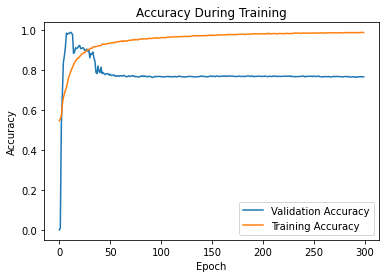

In [24]:
# 해당 코드 실행 시 val_acc 또는 acc에서 오류 발생 시, 각각 val_accuracy 와 accuracy로 바꿔서 실행하도록 한다.
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])


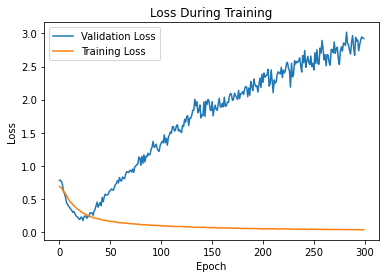

In [25]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])
plt.show()